In [38]:
#read csv valid responses

import pandas as pd


valid_responses = pd.read_csv('valid_responses.csv')
valid_responses.head(1)

total_valid_responses = len(valid_responses)

# Problems with requirements faced generally

In [39]:
len(valid_responses['Q7'].dropna())

# replace e.g., with e.g.
valid_responses['Q7'] = valid_responses['Q7'].str.replace(', e.g.,', '\n e.g. ')
valid_responses['Q7'] = valid_responses['Q7'].str.replace(' e.g.,', '\n e.g. ')
valid_responses['Q7'] = valid_responses['Q7'].str.replace(', i.e., ', '\n i.e. ')
valid_responses['Q7'] = valid_responses['Q7'].str.replace(' i.e., ', '\n i.e. ')
valid_responses['Q7'] = valid_responses['Q7'].str.replace('different places, requirements', 'different places or requirements') 

#slit the values in the column and stack them
problems = valid_responses['Q7'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
# avoid splitting if the comma is between "different places, requirements"


problem_counts = problems.value_counts().reset_index()

#rename columns to Primary activities performed and Number of Respondents

problem_counts.columns = ['Problems faced with requirements (RTD Instances)', 'Number of Respondents']
#calculate percentages
#problem_counts['Perentage of respondents'] = problem_counts['Number of Respondents']/problem_counts['Number of Respondents'].sum()*100

problem_counts['Perentage of respondents'] = problem_counts['Number of Respondents']/len(valid_responses['Q7'].dropna())*100

problem_counts

,Problems faced with requirements (RTD Instances),Number of Respondents,Perentage of respondents
0,Insufficient documentation of requirements\n i...,33,63.461538
1,Not capturing essential user needs while gathe...,29,55.769231
2,Changes in the requirements documentation,27,51.923077
3,Inadequate (incorrect or partial) implementati...,26,50.000000
4,Trade-offs between what requirements to implem...,25,48.076923
5,Ambiguities in requirements documentation\n e....,24,46.153846
6,Lack of requirements validation with the user,20,38.461538
7,Lack of requirements traceability,20,38.461538
8,Requirements are not satisfied by the system d...,15,28.846154
9,Not documenting requirements at all,15,28.846154


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/979747491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=problem_counts, x='Number of Respondents', y='Problems faced with requirements (RTD Instances)', palette=colors)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead

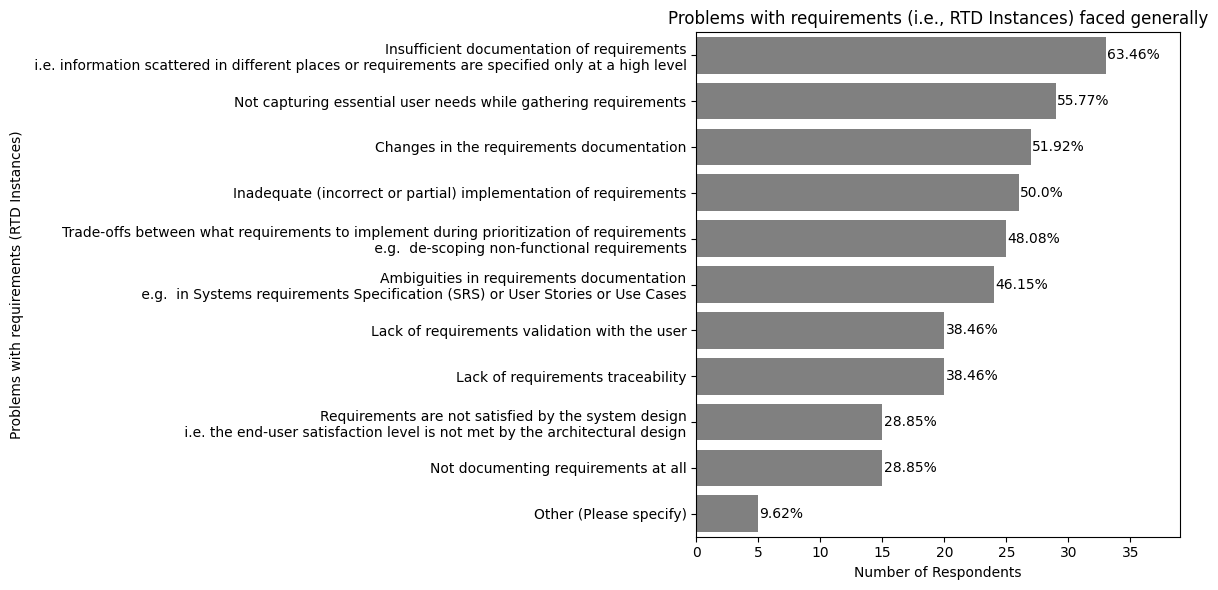

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = problem_counts['Number of Respondents'].max()

# Sort the data to find the top three percentages
problem_counts = problem_counts.sort_values(by='Number of Respondents', ascending=False)
top_three = problem_counts.head(3)

# Create a custom color palette
#colors = ['skyblue' if i in top_three.index else 'grey' for i in range(len(problem_counts))]
#all grey
colors = ['grey' for i in range(len(problem_counts))]

plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=problem_counts, x='Number of Respondents', y='Problems faced with requirements (RTD Instances)', palette=colors)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in problem_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 6)  # Increase the limit based on your data

# Set the chart title and labels
plt.title('Problems with requirements (i.e., RTD Instances) faced generally')
plt.xlabel('Number of Respondents')
plt.ylabel('Problems with requirements (RTD Instances)')
plt.tight_layout()


plt.savefig('Plots/problems.svg')

plt.savefig('Plots/problems.png')

# Show the plot
plt.show()


In [41]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q7'] == 'Other (Please specify)']

other_rows['Q7_11_TEXT']

Series([], Name: Q7_11_TEXT, dtype: object)

# CIT

In [42]:
cit_rtd = valid_responses['Q58'].dropna()

cit_rtd.count() #35 responses

cit_rtd

0     Initially tasked with revamping the UI of a me...
1     In a recent project, we had to do the data mig...
4     A new requirement was added and we had to chan...
5     Requirements were not clear to the Dev team so...
6     There was a use case that was completely misse...
7     Having to constantly tweak the implementation ...
8     Not capturing the volumes that would need to b...
9     Requirements not communicated by the client un...
10    The initial implemenation of a project did not...
11    Watefall methodology. Requirements signed off ...
12    Customer Transaction al data were accumulated ...
13    Concurrency issues caused by more application ...
14    Having to change the implementation of my appl...
15    There is a code update in which I was using th...
16    Developers invested 4-5 months of time on a pr...
20    We started developing our software before doin...
21    In order to effectively use the output dataset...
23    Fixing a solid and agreeable end to when a

# Problems with requirements faced in CIT

In [43]:
len(valid_responses['Q8'].dropna())

#Q8 Think about the incident you described. What was the most significant problem (or the problems) with requirements that created the significant impact on your project (or company)

# replace e.g., with e.g.
#valid_responses['Q8'] = valid_responses['Q8'].str.replace(', e.g.,', ' e.g. ')
#valid_responses['Q8'] = valid_responses['Q8'].str.replace(', i.e., ', ' i.e. ')



valid_responses['Q8'] = valid_responses['Q8'].str.replace(', e.g.,', ' \n e.g. ')
valid_responses['Q8'] = valid_responses['Q8'].str.replace(' e.g.,', ' \n e.g. ')
valid_responses['Q8'] = valid_responses['Q8'].str.replace(', i.e., ', ' \n i.e. ')
valid_responses['Q8'] = valid_responses['Q8'].str.replace(' i.e., ', ' \n i.e. ')
valid_responses['Q8'] = valid_responses['Q8'].str.replace('different places, requirements', 'different places or requirements') 

#slit the values in the column and stack them
significant_problem_counts = valid_responses['Q8'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

significant_problem_counts = significant_problem_counts.value_counts().reset_index()

#rename columns to Primary activities performed and Number of Respondents

significant_problem_counts.columns = ['Most significant problems faced in incident', 'Number of Respondents']
#calculate percentages
significant_problem_counts['Perentage of respondents'] = significant_problem_counts['Number of Respondents']/len(valid_responses['Q8'].dropna())*100

significant_problem_counts


,Most significant problems faced in incident,Number of Respondents,Perentage of respondents
0,Changes in the requirements documentation,21,42.857143
1,Lack of requirements validation with the user,18,36.734694
2,Insufficient documentation of requirements \n ...,17,34.693878
3,Not capturing essential user needs while gathe...,15,30.612245
4,Requirements are not satisfied by the system d...,14,28.571429
5,Inadequate (incorrect or partial) implementati...,11,22.448980
6,Ambiguities in requirements documentation \n e...,10,20.408163
7,Lack of requirements traceability,10,20.408163
8,Trade-offs between what requirements to implem...,8,16.326531
9,Not documenting requirements at all,5,10.204082


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/278573193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=significant_problem_counts, x='Number of Respondents', y='Most significant problems faced in incident', palette=colors)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

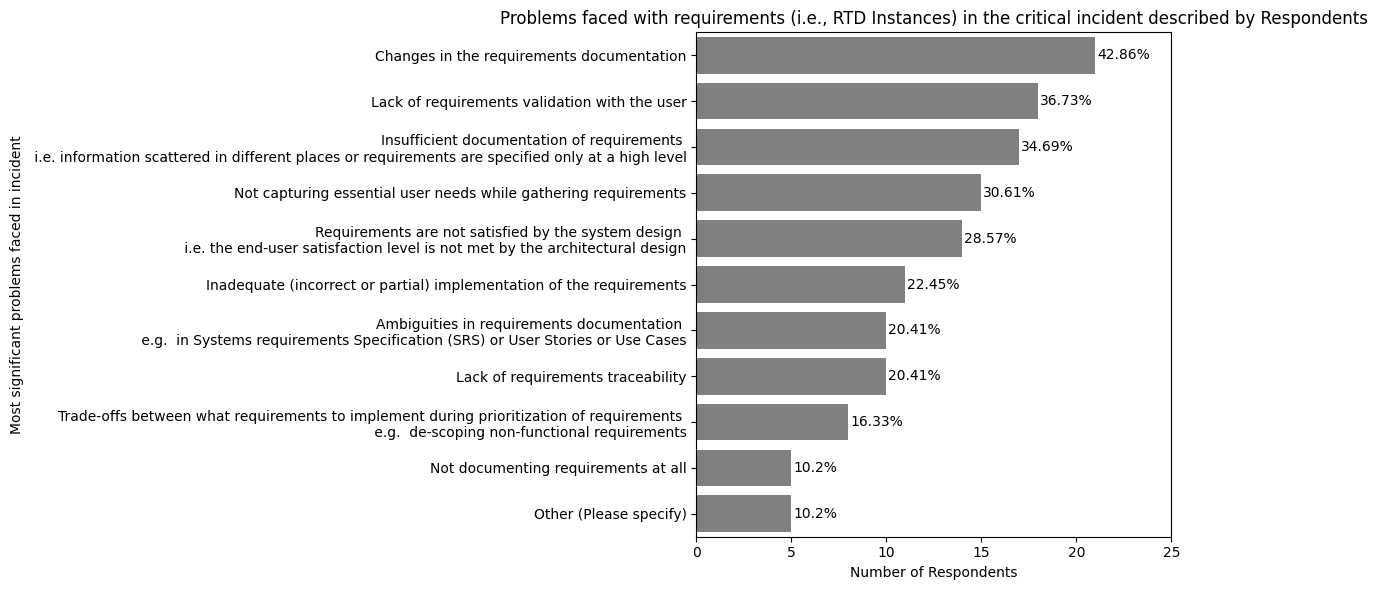

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = significant_problem_counts['Number of Respondents'].max()

# Sort the data to find the top three percentages
significant_problem_counts = significant_problem_counts.sort_values(by='Number of Respondents', ascending=False)
top_three = significant_problem_counts.head(3)

# Create a custom color palette
#colors = ['skyblue' if i in top_three.index else 'grey' for i in range(len(significant_problem_counts))]
colors = ['grey' for i in range(len(significant_problem_counts))]

plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=significant_problem_counts, x='Number of Respondents', y='Most significant problems faced in incident', palette=colors)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in significant_problem_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 4)  # Increase the limit based on your data


# Set the chart title and labels
plt.title('Problems faced with requirements (i.e., RTD Instances) in the critical incident described by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Most significant problems faced in incident')
plt.tight_layout()


plt.savefig('Plots/problems_CIT.svg')

plt.savefig('Plots/problems_CIT.png')

# Show the plot
plt.show()


In [45]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q8'] == 'Other (Please specify)']

other_rows['Q8_11_TEXT']

11    As per previous answer. Inability to continuou...
27    Miscommunication with stakeholders, who approv...
Name: Q8_11_TEXT, dtype: object

* generally documentation is insufficient but changes to docs cause more problems

# RQ7: What are the current practices of quantifying RTD?

## RQ7.1 How often do practitioners fix RTD?

### How often practitioners fix RTD Instances in general

In [46]:
#replace with "Unknown" if nan
valid_responses['Q9'].dropna()

#slit the values in the column and stack them
frq_counts = valid_responses['Q9'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

frq_counts = frq_counts.value_counts().reset_index()

#rename columns

frq_counts.columns = ['Frequency of fixing problems', 'Number of Respondents']

#calculate percentages
frq_counts['Perentage of respondents'] = frq_counts['Number of Respondents']/len(valid_responses['Q9'].dropna())*100

frq_counts

,Frequency of fixing problems,Number of Respondents,Perentage of respondents
0,During implementing software features,33,68.750000
1,During designing the software architecture,26,54.166667
2,During testing the software features,24,50.000000
3,Before designing or implementing the software ...,23,47.916667
4,Quick fixes just before delivering the software,14,29.166667
5,It's NOT a common practice to fix problems wit...,2,4.166667
6,Other (Please Specify),1,2.083333


In [47]:
frq_counts['Frequency of fixing problems'] = frq_counts['Frequency of fixing problems'].apply(lambda x: x.replace('problems with ', 'problems with \n'))
frq_counts['Frequency of fixing problems']

0                During implementing software features
1           During designing the software architecture
2                 During testing the software features
3    Before designing or implementing the software ...
4      Quick fixes just before delivering the software
5    It's NOT a common practice to fix problems wit...
6                               Other (Please Specify)
Name: Frequency of fixing problems, dtype: object

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/3823927318.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frq_counts, x='Number of Respondents', y='Frequency of fixing problems', palette=colors)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence t

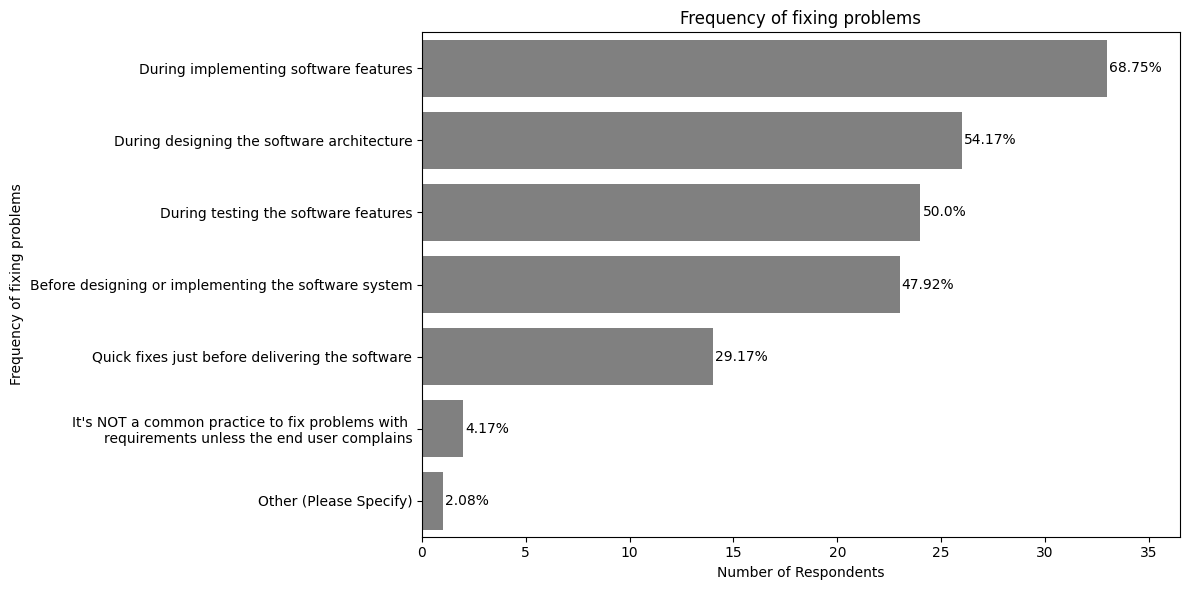

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = frq_counts['Number of Respondents'].max()

# Sort the data to find the top three percentages
#significant_problem_counts = significant_problem_counts.sort_values(by='Number of Respondents', ascending=False)
#top_three = significant_problem_counts.head(3)

# Create a custom color palette
#colors = ['skyblue' if i in top_three.index else 'grey' for i in range(len(significant_problem_counts))]

#colors = ['skyblue' if freq in ['During implementing software features'] else 'grey' for freq in frq_counts['Frequency of fixing problems']]

#all colrs grey
colors = ['grey' for i in range(len(frq_counts))]

plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=frq_counts, x='Number of Respondents', y='Frequency of fixing problems', palette=colors)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in frq_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 3.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate


# Set the chart title and labels
plt.title('Frequency of fixing problems')
plt.xlabel('Number of Respondents')
plt.ylabel('Frequency of fixing problems')
plt.tight_layout()


plt.savefig('Plots/frequency_fixing.svg')

plt.savefig('Plots/frequency_fixing.png')

# Show the plot
plt.show()


### When problems in the critical incident were fixed

In [49]:
#Q10

#dropna
valid_responses['Q10'].dropna()

#slit the values in the column and stack them
fix_frq_counts_cit = valid_responses['Q10'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

fix_frq_counts_cit = fix_frq_counts_cit.value_counts().reset_index()

#rename columns

fix_frq_counts_cit.columns = ['When problems in the critical incident were fixed', 'Number of Respondents']

#calculate percentages
fix_frq_counts_cit['Perentage of respondents'] = fix_frq_counts_cit['Number of Respondents']/len(valid_responses['Q10'].dropna())*100

fix_frq_counts_cit

,When problems in the critical incident were fixed,Number of Respondents,Perentage of respondents
0,During implementing software features,16,32.653061
1,We fixed them only when the end user complaine...,6,12.244898
2,Before designing or implementing the software ...,6,12.244898
3,During testing the software features,6,12.244898
4,We DID NOT fix them,6,12.244898
5,During designing the software architecture,4,8.163265
6,A quick fix just before delivering the software,4,8.163265
7,Other (Please Specify),1,2.040816


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/2461916928.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fix_frq_counts_cit, x='Number of Respondents', y='When problems in the critical incident were fixed', palette=colors)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` i

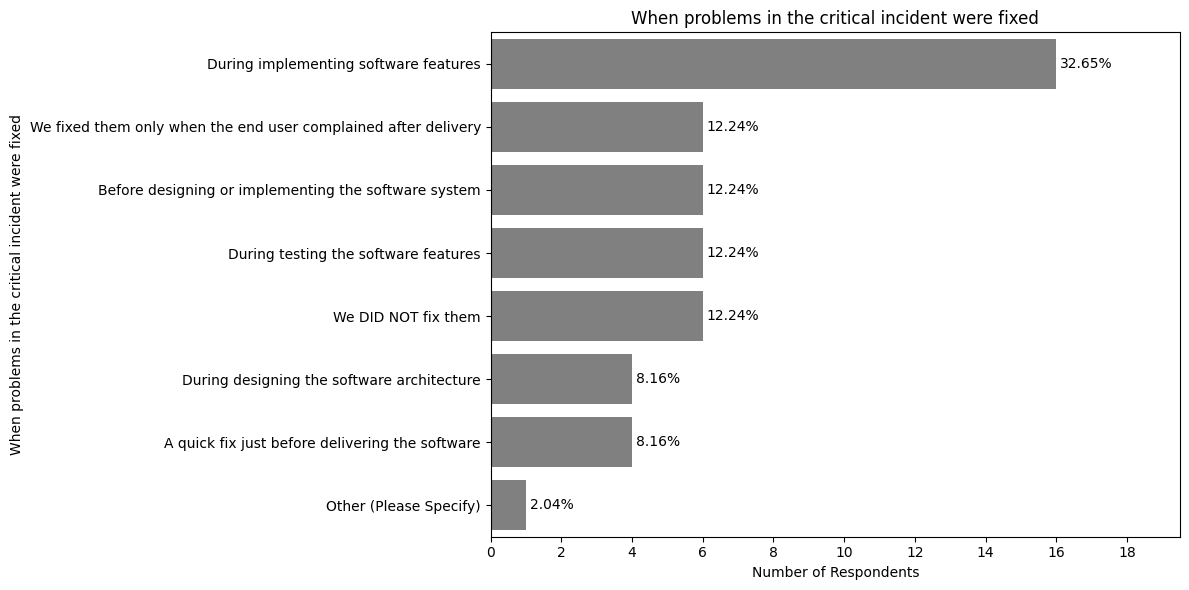

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = fix_frq_counts_cit['Number of Respondents'].max()

# Sort the data to find the top three percentages
#significant_problem_counts = significant_problem_counts.sort_values(by='Number of Respondents', ascending=False)
#top_three = significant_problem_counts.head(3)

# Create a custom color palette
#colors = ['skyblue' if i in top_three.index else 'grey' for i in range(len(significant_problem_counts))]

#colors = ['skyblue' if freq in ['During implementing software features'] else 'grey' for freq in fix_frq_counts_cit['When problems in the critical incident were fixed']]

#colors all grey
colors = ['grey' for i in range(len(fix_frq_counts_cit))]

plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=fix_frq_counts_cit, x='Number of Respondents', y='When problems in the critical incident were fixed', palette=colors)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in fix_frq_counts_cit.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 3.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate

# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('When problems in the critical incident were fixed')
plt.xlabel('Number of Respondents')
plt.ylabel('When problems in the critical incident were fixed')
plt.tight_layout()


plt.savefig('Plots/cit_frequency_fixing.svg')

plt.savefig('Plots/cit_frequency_fixing.png')

# Show the plot
plt.show()


## RQ7.2 What concepts of RTD quantification were formally or informally quantified by practitioners when fixing RTD?
## RQ7.3 What are the reasons for not quantifying RTD?

### Practitioners who quantified the cost to fix

* Note: Percentages are calculated from those who answered the question given that the questions are optional

In [51]:
# Q11 When you fixed those problems with requirements, did you formally or informally quantify the effort or cost to fix? By 'quantifying', we mean measuring or estimating.

#dropna
quantify_cost = valid_responses['Q11'].dropna()

quantify_cost_counts = quantify_cost.value_counts().reset_index()

#rename columns

quantify_cost_counts.columns = ['Quantification of the cost to fix', 'Number of Respondents']

#calculate percentages
quantify_cost_counts['Perentage of respondents'] = quantify_cost_counts['Number of Respondents']/len(valid_responses['Q11'].dropna())*100

quantify_cost_counts

#draw chart

#sns.barplot(data=quantify_cost_counts, x='Number of Respondents', y='Quantification of the cost to fix', palette='Set2')


,Quantification of the cost to fix,Number of Respondents,Perentage of respondents
0,"NO, did not formally or informally quantify th...",15,46.875
1,"Yes, formally quantified the effort or cost to...",11,34.375
2,"Yes, informally quantified the effort or cost ...",6,18.750


In [52]:
quantify_cost_counts['Quantification of the cost to fix'] = quantify_cost_counts['Quantification of the cost to fix'].apply(lambda x: x.replace('e.g.,', ' \n e.g.,'))
quantify_cost_counts['Quantification of the cost to fix']

0    NO, did not formally or informally quantify th...
1    Yes, formally quantified the effort or cost to...
2    Yes, informally quantified the effort or cost ...
Name: Quantification of the cost to fix, dtype: object

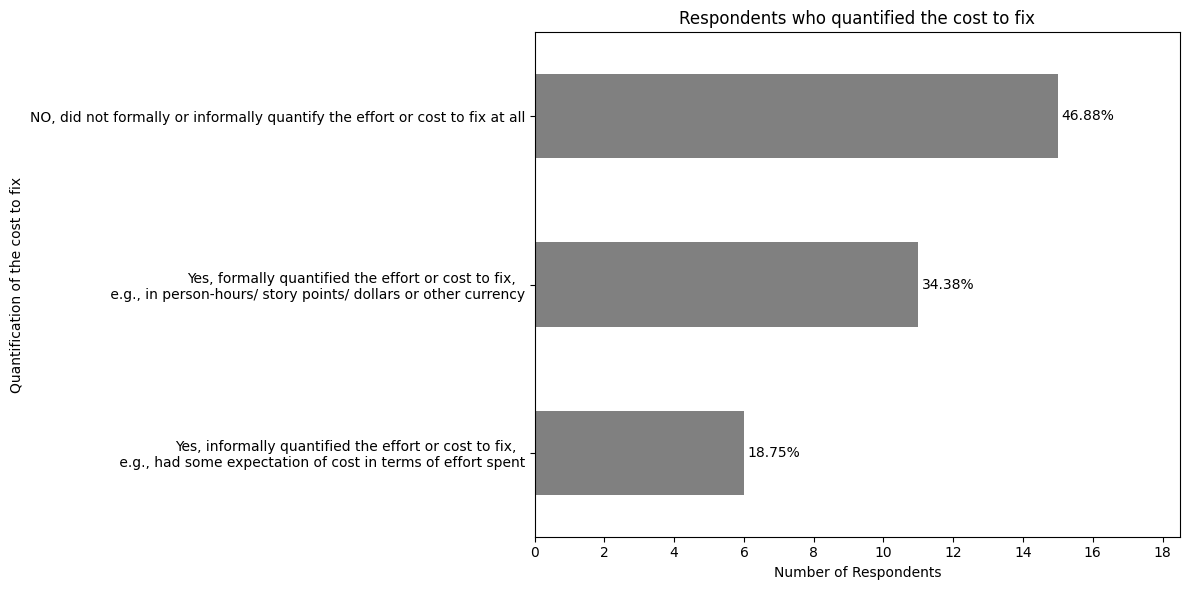

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = quantify_cost_counts['Number of Respondents'].max()

# Sort the data to find the top three percentages
#significant_problem_counts = significant_problem_counts.sort_values(by='Number of Respondents', ascending=False)
#top_three = significant_problem_counts.head(3)

# Create a custom color palette
#colors = ['skyblue' if i in top_three.index else 'grey' for i in range(len(significant_problem_counts))]

#colors = ['skyblue' if freq in ['During implementing software features'] else 'grey' for freq in fix_frq_counts_cit['When problems in the critical incident were fixed']]


plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=quantify_cost_counts, x='Number of Respondents', y='Quantification of the cost to fix', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in quantify_cost_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 3.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate



# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Respondents who quantified the cost to fix')
plt.xlabel('Number of Respondents')
plt.ylabel('Quantification of the cost to fix')
plt.tight_layout()

plt.savefig('Plots/cost_to_fix.svg')

plt.savefig('Plots/cost_to_fix.png')

# Show the plot
plt.show()


### Reasons for not quantifying the cost

In [54]:
# Q12

#dropna
not_quantifying_cost = valid_responses['Q12'].dropna()

not_quantifying_cost_counts = not_quantifying_cost.value_counts().reset_index()

#rename columns

not_quantifying_cost_counts.columns = ['Reasons for not quantifying the cost to fix', 'Number of Respondents']


#calculate percentages
not_quantifying_cost_counts['Perentage of respondents'] = not_quantifying_cost_counts['Number of Respondents']/len(valid_responses['Q12'].dropna())*100

not_quantifying_cost_counts

#draw chart

#sns.barplot(data=not_quantifying_cost_counts, x='Number of Respondents', y='Reasons for not quantifying the cost to fix', palette='Set2')


,Reasons for not quantifying the cost to fix,Number of Respondents,Perentage of respondents
0,I am not the decision-maker; higher management...,6,40.000000
1,Some decisions are made by experience (expert ...,4,26.666667
2,Other (Please specify),2,13.333333
3,"There are reliable ways, but they are time-con...",2,13.333333
4,There are NO reliable ways to quantify the eff...,1,6.666667


In [55]:
not_quantifying_cost_counts['Reasons for not quantifying the cost to fix'] = not_quantifying_cost_counts['Reasons for not quantifying the cost to fix'] .apply(lambda x: x.replace('So I did', ' \n So I did'))
not_quantifying_cost_counts['Reasons for not quantifying the cost to fix'] = not_quantifying_cost_counts['Reasons for not quantifying the cost to fix'] .apply(lambda x: x.replace('rather than', ' \n rather than'))
not_quantifying_cost_counts['Reasons for not quantifying the cost to fix'] 

0    I am not the decision-maker; higher management...
1    Some decisions are made by experience (expert ...
2                               Other (Please specify)
3    There are reliable ways, but they are time-con...
4    There are NO reliable ways to quantify the eff...
Name: Reasons for not quantifying the cost to fix, dtype: object

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/4267834410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=not_quantifying_cost_counts, x='Number of Respondents', y='Reasons for not quantifying the cost to fix', palette=colors, width=0.5)
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_7262/4267834410.py:13: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(data=not_quantifying_cost_counts, x='Number of Respondents', y='Reasons for not quantifying the cost to fix', palette=colors, width=0.5)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name

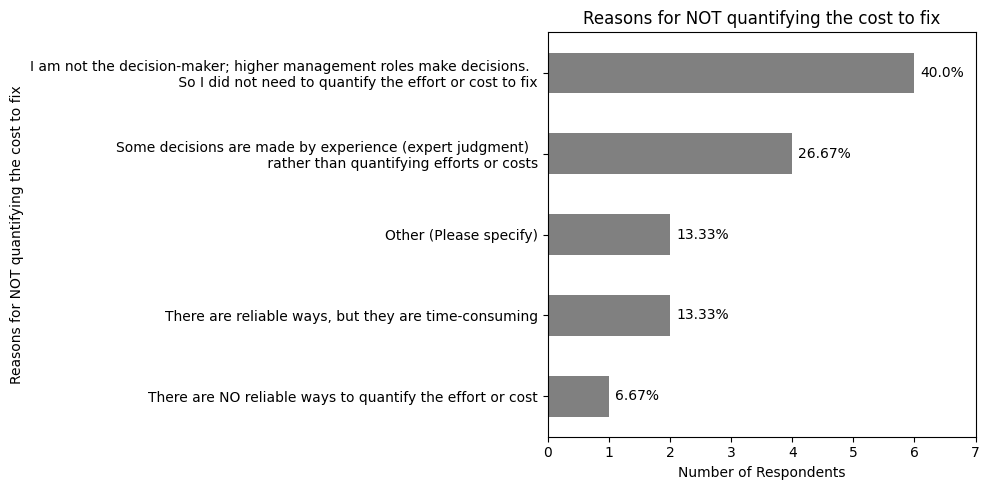

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = not_quantifying_cost_counts['Number of Respondents'].max()

colors = ['skyblue' if freq in ['I am not the decision-maker; higher management roles make decisions.  \n So I did not need to quantify the effort or cost to fix'] else 'grey' for freq in fix_frq_counts_cit['When problems in the critical incident were fixed']]


plt.figure(figsize=(10, 5))
# Create the barplot
ax = sns.barplot(data=not_quantifying_cost_counts, x='Number of Respondents', y='Reasons for not quantifying the cost to fix', palette=colors, width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in not_quantifying_cost_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 1)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate

# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Reasons for NOT quantifying the cost to fix')
plt.xlabel('Number of Respondents')
plt.ylabel('Reasons for NOT quantifying the cost to fix')
plt.tight_layout()

plt.savefig('Plots/reasons_NOT_quantifying_cost_to_fix.svg')

plt.savefig('Plots/reasons_NOT_quantifying_cost_to_fix.png')

# Show the plot
plt.show()


In [58]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q12'] == 'Other (Please specify)']

other_rows['Q12_6_TEXT']

3    Since most of those are issues from the projec...
6              We considered the fix as a new project 
Name: Q12_6_TEXT, dtype: object

### Practitioners who quantified the benefit of fixing

In [59]:
# Q13

#dropna
quantifying_benefit = valid_responses['Q13'].dropna()

quantifying_benefit_counts = quantifying_benefit.value_counts().reset_index()

#rename columns

quantifying_benefit_counts.columns = ['Quantification of the benefit of fixing', 'Number of Respondents']

#calculate percentages
quantifying_benefit_counts['Perentage of respondents'] = quantifying_benefit_counts['Number of Respondents']/len(valid_responses['Q13'].dropna())*100

quantifying_benefit_counts

#draw chart

#sns.barplot(data=quantifying_benefit_counts, x='Number of Respondents', y='Quantification of the benefit of fixing', palette='Set2')


,Quantification of the benefit of fixing,Number of Respondents,Perentage of respondents
0,"Yes, informally quantified the benefit of fixi...",20,64.516129
1,"NO, did not formally or informally quantify th...",8,25.806452
2,"Yes, formally quantified the benefit of fixing...",3,9.677419


In [60]:
quantifying_benefit_counts['Quantification of the benefit of fixing'] = quantifying_benefit_counts['Quantification of the benefit of fixing'].apply(lambda x: x.replace('e.g.,', ' \n e.g.,'))
quantifying_benefit_counts['Quantification of the benefit of fixing']

0    Yes, informally quantified the benefit of fixi...
1    NO, did not formally or informally quantify th...
2    Yes, formally quantified the benefit of fixing...
Name: Quantification of the benefit of fixing, dtype: object

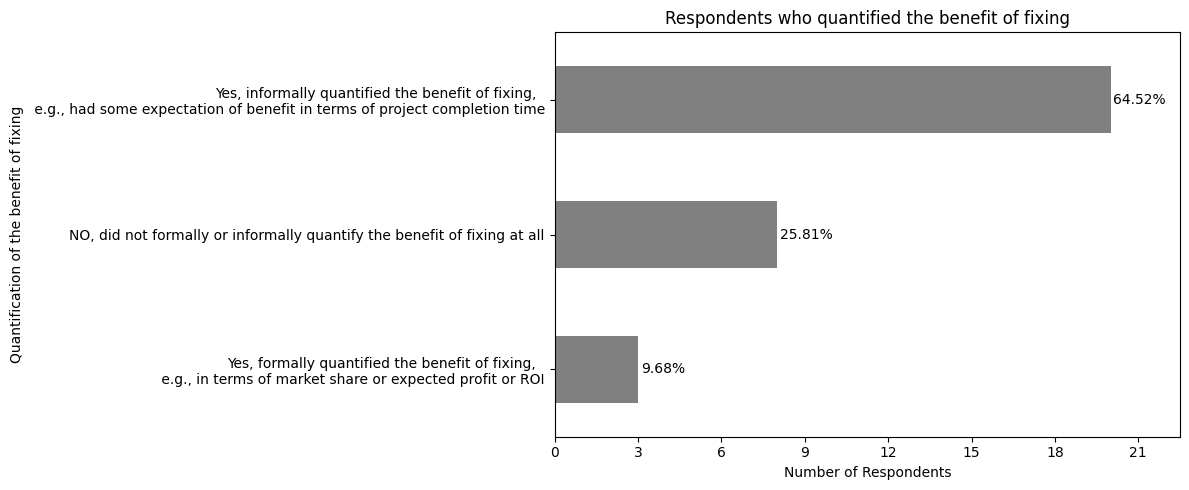

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = quantifying_benefit_counts['Number of Respondents'].max()


plt.figure(figsize=(12, 5))
# Create the barplot
ax = sns.barplot(data=quantifying_benefit_counts, x='Number of Respondents', y='Quantification of the benefit of fixing', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in quantifying_benefit_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 2.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate

# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


# Set the chart title and labels
plt.title('Respondents who quantified the benefit of fixing')
plt.xlabel('Number of Respondents')
plt.ylabel('Quantification of the benefit of fixing')
plt.tight_layout()

plt.savefig('Plots/benefit_of_fixing.svg')

plt.savefig('Plots/benefit_of_fixing.png')

# Show the plot
plt.show()


### Reasons for not quantifying the benefit

In [62]:
# Q14

#dropna
not_quantifying_benefit = valid_responses['Q14'].dropna()

not_quantifying_benefit_counts = not_quantifying_benefit.value_counts().reset_index()

#rename columns

not_quantifying_benefit_counts.columns = ['Reasons for not quantifying the benefit of fixing', 'Number of Respondents']
#calculate percentages
not_quantifying_benefit_counts['Perentage of respondents'] = not_quantifying_benefit_counts['Number of Respondents']/len(valid_responses['Q14'].dropna())*100

not_quantifying_benefit_counts

#draw chart

#sns.barplot(data=not_quantifying_benefit_counts, x='Number of Respondents', y='Reasons for not quantifying the benefit of fixing', palette='Set2')


,Reasons for not quantifying the benefit of fixing,Number of Respondents,Perentage of respondents
0,I am not the decision-maker; higher management...,4,50.0
1,Some decisions are made by experience (expert ...,2,25.0
2,There are NO reliable ways to quantify the ben...,1,12.5
3,Other (Please specify),1,12.5


In [63]:
not_quantifying_benefit_counts['Reasons for not quantifying the benefit of fixing'] = not_quantifying_benefit_counts['Reasons for not quantifying the benefit of fixing'].apply(lambda x: x.replace('So I did', ' \n So I did'))
not_quantifying_benefit_counts['Reasons for not quantifying the benefit of fixing'] = not_quantifying_benefit_counts['Reasons for not quantifying the benefit of fixing'].apply(lambda x: x.replace('rather than', ' \n rather than'))
not_quantifying_benefit_counts['Reasons for not quantifying the benefit of fixing'] 

0    I am not the decision-maker; higher management...
1    Some decisions are made by experience (expert ...
2    There are NO reliable ways to quantify the ben...
3                               Other (Please specify)
Name: Reasons for not quantifying the benefit of fixing, dtype: object

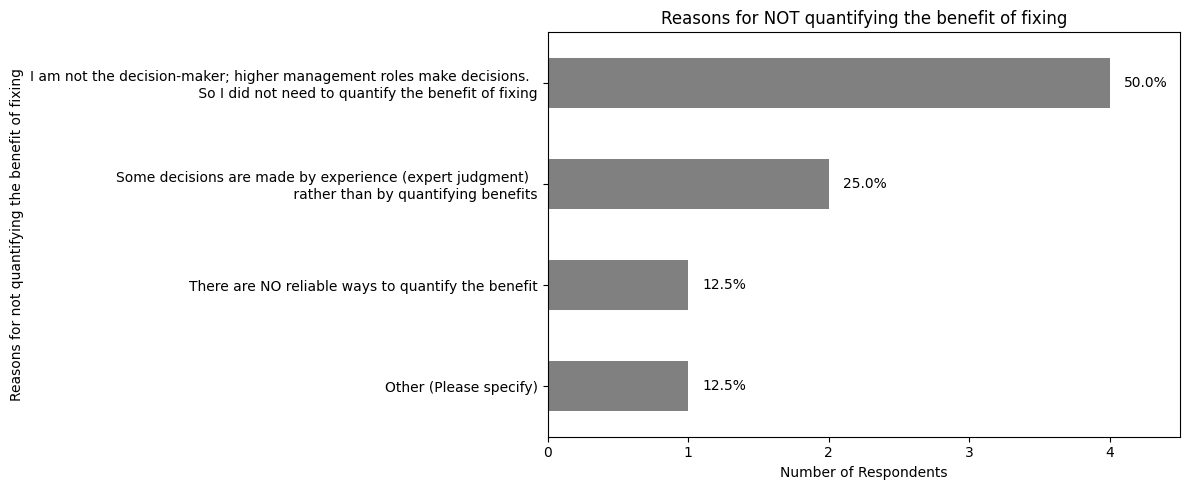

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = not_quantifying_benefit_counts['Number of Respondents'].max()


plt.figure(figsize=(12, 5))
# Create the barplot
ax = sns.barplot(data=not_quantifying_benefit_counts, x='Number of Respondents', y='Reasons for not quantifying the benefit of fixing', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in not_quantifying_benefit_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 0.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate

# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
 # Vertically align text to the center of the specified y coordinate


# Set the chart title and labels
plt.title('Reasons for NOT quantifying the benefit of fixing')
plt.xlabel('Number of Respondents')
plt.ylabel('Reasons for not quantifying the benefit of fixing')
plt.tight_layout()

plt.savefig('Plots/reasons_NOT_quantifying_benefit_of_fixing.svg')

plt.savefig('Plots/reasons_NOT_quantifying_benefit_of_fixing.png')

# Show the plot
plt.show()


In [65]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q14'] == 'Other (Please specify)']

other_rows['Q14_6_TEXT']

34    It was not deemed a priority to do so.
Name: Q14_6_TEXT, dtype: object

### Consequences of not fixing

In [66]:
#Q15 Were there consequences (or negative impacts) in terms of extra efforts or costs later in the project due to NOT fixing or delaying to fix those problems with requirements? Select all that apply. 

#dropna
valid_responses['Q15'].dropna()

#replace Yes, with Yes
valid_responses['Q15'] = valid_responses['Q15'].str.replace('Yes, there were', ' ')
valid_responses['Q15'] = valid_responses['Q15'].str.replace('NO, there were', ' ')
valid_responses['Q15'] = valid_responses['Q15'].str.replace(', e.g., ', ' e.g. ')

#slit the values in the column and stack them
consequences = valid_responses['Q15'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

consequences_counts = consequences.value_counts().reset_index()

#rename columns

consequences_counts.columns = ['Consequences (or negative impacts) in terms of extra efforts or costs', 'Number of Respondents']
#calculate percentages
consequences_counts['Perentage of respondents'] = consequences_counts['Number of Respondents']/len(valid_responses['Q15'].dropna())*100

consequences_counts

,Consequences (or negative impacts) in terms of extra efforts or costs,Number of Respondents,Perentage of respondents
0,rework code costs e.g. refactoring software ...,23,48.936170
1,rework design costs e.g. redesigning the sof...,18,38.297872
2,new code costs e.g. writing new software code,17,36.170213
3,new design costs e.g. adding new components ...,16,34.042553
4,rework Requirements Engineering (RE) costs e...,11,23.404255
5,new Requirements Engineering (RE) costs e.g....,8,17.021277
6,Other (Please specify),5,10.638298
7,no consequences,4,8.510638


In [67]:
#draw chart

#sns.barplot(data=consequences_counts, x='Number of Respondents', y='Consequences (or negative impacts) in terms of extra efforts or costs', palette='Set2')

consequences_counts['Consequences (or negative impacts) in terms of extra efforts or costs'] = consequences_counts['Consequences (or negative impacts) in terms of extra efforts or costs'].apply(lambda x: x.replace('(RE) costs', ' \n (RE) costs'))
consequences_counts['Consequences (or negative impacts) in terms of extra efforts or costs']

0      rework code costs e.g. refactoring software ...
1      rework design costs e.g. redesigning the sof...
2        new code costs e.g. writing new software code
3      new design costs e.g. adding new components ...
4      rework Requirements Engineering  \n (RE) cos...
5      new Requirements Engineering  \n (RE) costs ...
6                               Other (Please specify)
7                                      no consequences
Name: Consequences (or negative impacts) in terms of extra efforts or costs, dtype: object

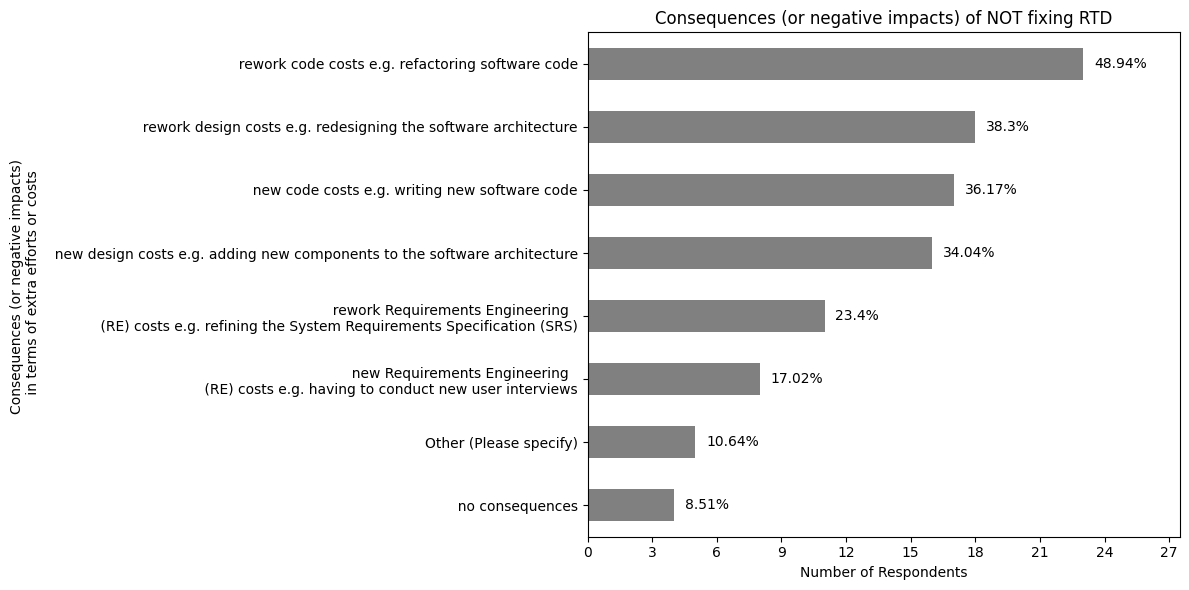

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = consequences_counts['Number of Respondents'].max()


plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=consequences_counts, x='Number of Respondents', y='Consequences (or negative impacts) in terms of extra efforts or costs', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in consequences_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.5,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 4.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate

# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
 # Vertically align text to the center of the specified y coordinate)  # Vertically align text to the center of the specified y coordinate


# Set the chart title and labels
plt.title('Consequences (or negative impacts) of NOT fixing RTD')
plt.xlabel('Number of Respondents')
plt.ylabel('Consequences (or negative impacts) \n in terms of extra efforts or costs')
plt.tight_layout()

plt.savefig('Plots/consequences.svg')

plt.savefig('Plots/consequences.png')

# Show the plot
plt.show()


* rework being validated is interesting 

#### Other consequences

In [69]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q15'] == 'Other (Please specify)']

other_rows['Q15_7_TEXT']

8     We pivoted out as the problem was found during...
16                     The entire project was scrapped 
28                                bugs would be raised.
40    The true costs remain to be seen, however it i...
Name: Q15_7_TEXT, dtype: object

### Practitioners who quantified the consequences of not fixing

In [70]:
#Q16 Did you formally or informally quantify such consequences, i.e., extra efforts or costs incurred in the project, due to NOT fixing or delaying to fix those problems with requirements? By 'quantifying', we mean measuring or estimating.

# Q13

#dropna
quantifying_consequences = valid_responses['Q16'].dropna()

quantifying_consequences_counts = quantifying_consequences.value_counts().reset_index()

#rename columns

quantifying_consequences_counts.columns = ['Quantification of consequences (RTD Interest)', 'Number of Respondents']
#calculate percentages
quantifying_consequences_counts['Perentage of respondents'] = quantifying_consequences_counts['Number of Respondents']/len(valid_responses['Q16'].dropna())*100

quantifying_consequences_counts

#draw chart

#sns.barplot(data=quantifying_consequences_counts, x='Number of Respondents', y='Quantification of consequences (RTD Interest)', palette='Set2')


,Quantification of consequences (RTD Interest),Number of Respondents,Perentage of respondents
0,"Yes, formally quantified the extra efforts or ...",14,37.837838
1,"Yes, informally quantified the extra efforts o...",12,32.432432
2,"NO, did not formally or informally quantify th...",11,29.729730


In [71]:
#draw chart

#sns.barplot(data=consequences_counts, x='Number of Respondents', y='Consequences (or negative impacts) in terms of extra efforts or costs', palette='Set2')

quantifying_consequences_counts['Quantification of consequences (RTD Interest)'] = quantifying_consequences_counts['Quantification of consequences (RTD Interest)'].apply(lambda x: x.replace('e.g.,', ' \n e.g.,'))
quantifying_consequences_counts['Quantification of consequences (RTD Interest)'] 

0    Yes, formally quantified the extra efforts or ...
1    Yes, informally quantified the extra efforts o...
2    NO, did not formally or informally quantify th...
Name: Quantification of consequences (RTD Interest), dtype: object

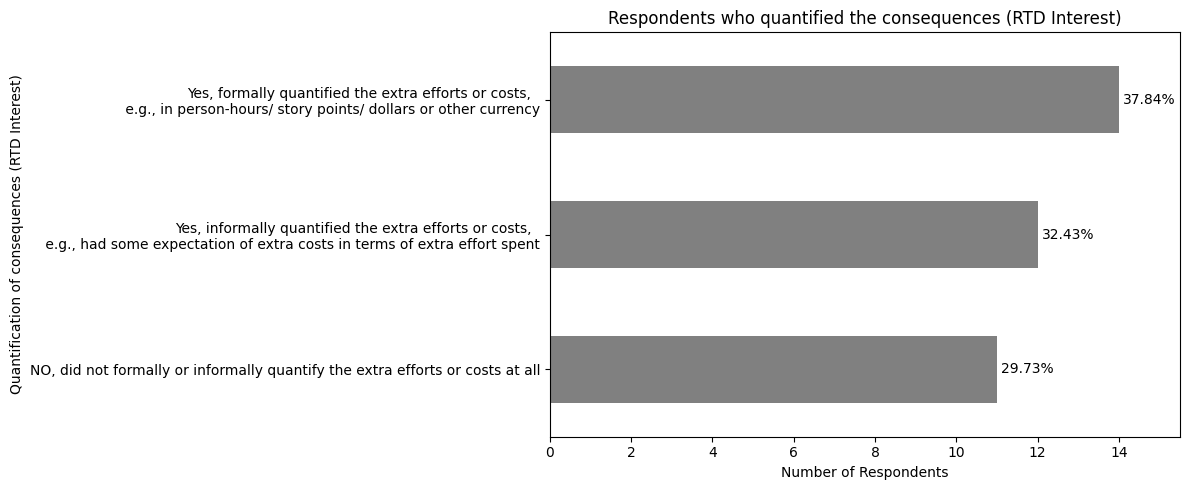

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = quantifying_consequences_counts['Number of Respondents'].max()


plt.figure(figsize=(12, 5))
# Create the barplot
ax = sns.barplot(data=quantifying_consequences_counts, x='Number of Respondents', y='Quantification of consequences (RTD Interest)', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in quantifying_consequences_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 1.5)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate
# Vertically align text to the center of the specified y coordinate


# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
 # Vertically align text to the center of the specified y coordinate)  # Vertically align text to the center of the specified y coordinate


# Set the chart title and labels
plt.title('Respondents who quantified the consequences (RTD Interest)')
plt.xlabel('Number of Respondents')
plt.ylabel('Quantification of consequences (RTD Interest)')
plt.tight_layout()

plt.savefig('Plots/quantifying_consequences.svg')

plt.savefig('Plots/quantifying_consequences.png')

# Show the plot
plt.show()


### Reasons for not quantifying the consequences

In [73]:
# Q52

#dropna
not_quantifying_consequences = valid_responses['Q52'].dropna()

not_quantifying_consequences_counts = not_quantifying_consequences.value_counts().reset_index()

#rename columns

not_quantifying_consequences_counts.columns = ['Reasons for not quantifying the consequences of NOT fixing', 'Number of Respondents']
#calculate percentages
not_quantifying_consequences_counts['Perentage of respondents'] = not_quantifying_consequences_counts['Number of Respondents']/len(valid_responses['Q52'].dropna()
)*100


not_quantifying_consequences_counts

#draw chart

#sns.barplot(data=not_quantifying_consequences_counts, x='Number of Respondents', y='Reasons for not quantifying the consequences of NOT fixing', palette='Set2')


,Reasons for not quantifying the consequences of NOT fixing,Number of Respondents,Perentage of respondents
0,I am not the decision-maker; higher management...,4,36.363636
1,Some decisions are made by experience (expert ...,4,36.363636
2,Other (Please specify),1,9.090909
3,"There are reliable ways, but they are time-con...",1,9.090909
4,"There are reliable ways, but they are expensive",1,9.090909


In [74]:
not_quantifying_consequences_counts['Reasons for not quantifying the consequences of NOT fixing'] = not_quantifying_consequences_counts['Reasons for not quantifying the consequences of NOT fixing'].apply(lambda x: x.replace('So I did', ' \n So I did'))
not_quantifying_consequences_counts['Reasons for not quantifying the consequences of NOT fixing'] = not_quantifying_consequences_counts['Reasons for not quantifying the consequences of NOT fixing'].apply(lambda x: x.replace('rather than', ' \n rather than'))
not_quantifying_consequences_counts['Reasons for not quantifying the consequences of NOT fixing']

0    I am not the decision-maker; higher management...
1    Some decisions are made by experience (expert ...
2                               Other (Please specify)
3    There are reliable ways, but they are time-con...
4      There are reliable ways, but they are expensive
Name: Reasons for not quantifying the consequences of NOT fixing, dtype: object

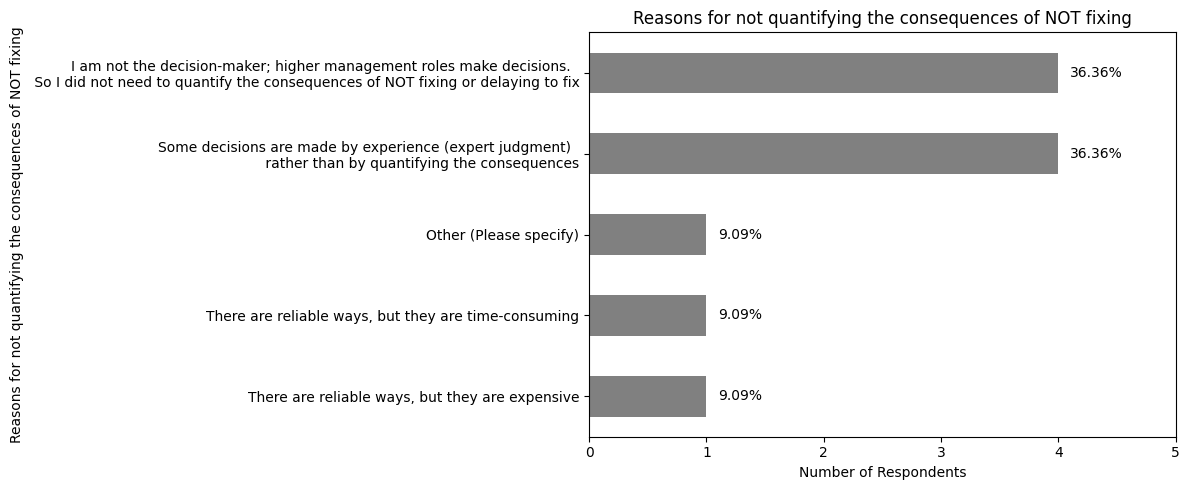

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = not_quantifying_consequences_counts['Number of Respondents'].max()


plt.figure(figsize=(12, 5))
# Create the barplot
ax = sns.barplot(data=not_quantifying_consequences_counts, x='Number of Respondents', y='Reasons for not quantifying the consequences of NOT fixing', color='grey', width=0.5)

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in not_quantifying_consequences_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0))  # Add background to text)  # Vertically align text to the center of the specified y coordinate
    
# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 1)  # Increase the limit based on your data)  # Vertically align text to the center of the specified y coordinate
# Vertically align text to the center of the specified y coordinate


# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
 # Vertically align text to the center of the specified y coordinate)  # Vertically align text to the center of the specified y coordinate
# Vertically align text to the center of the specified y coordinate


# Set the chart title and labels
plt.title('Reasons for not quantifying the consequences of NOT fixing')
plt.xlabel('Number of Respondents')
plt.ylabel('Reasons for not quantifying the consequences of NOT fixing')
plt.tight_layout()

plt.savefig('Plots/reasons_NOT_quantifying_consequences.svg')

plt.savefig('Plots/reasons_NOT_quantifying_consequences.png')

# Show the plot
plt.show()


In [76]:
# show reponses where the role is "Other (Please specify)"

other_rows = valid_responses.loc[valid_responses['Q52'] == 'Other (Please specify)']

other_rows['Q52_6_TEXT']

6    We didn’t have a need to do it, so we didn’t
Name: Q52_6_TEXT, dtype: object

# RQ8. How could RTD quantification support informed decision-making?

## Level of Agreement for Likert Scale Questions Q16 - Q20

In [77]:
#remove all Nans 
data_v = valid_responses[['Q25_1', 'Q26_1', 'Q43_1', 'Q58_1', 'Q59_1']].dropna()

data = valid_responses[['Q17_1', 'Q18_1', 'Q19_1', 'Q54_1', 'Q55_1']].dropna()

#rename columns to 

data.columns = ['Cost to fix', 'Benefit of fixing', 'Consequences of not fixing', 'Cost and Benefit', 'Cost, Benefit and Consequences']

/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


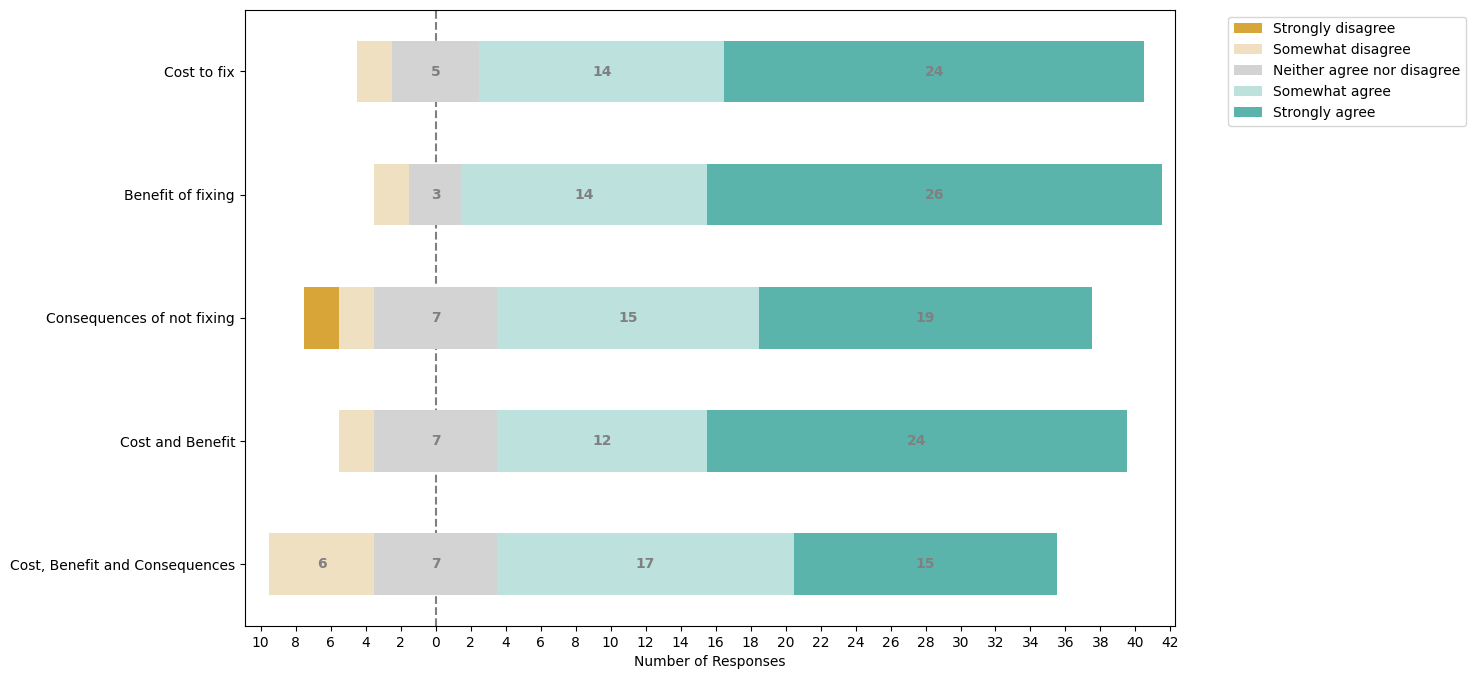

In [79]:
import plot_likert


scale = \
    ['Strongly disagree',
     'Somewhat disagree',
     'Neither agree nor disagree',
     'Somewhat agree',
     'Strongly agree']

plot_likert.plot_likert(data, scale, plot_percentage=False, colors=plot_likert.colors.likert5, bar_labels=True, bar_labels_color="grey", figsize=(12,8));